# Laboratorio 1: Análisis Básico de Datos E-commerce

En este laboratorio, practicarás el análisis de datos de e-commerce usando pandas y técnicas de visualización.

## Objetivos
1. Realizar análisis exploratorio de datos
2. Calcular métricas clave de ventas
3. Crear visualizaciones informativas
4. Identificar patrones en los datos

## Datos
Trabajaremos con un dataset de ventas de e-commerce que incluye información sobre:
- Productos y categorías
- Precios y cantidades
- Fechas de venta
- Canales de venta

## Ejercicio 1: Preparación y Exploración Inicial

### 1.1 Importar Bibliotecas y Configurar Ambiente
Importa las bibliotecas necesarias y configura el ambiente de visualización.

In [1]:
# TODO: Importar las bibliotecas necesarias (pandas, numpy, matplotlib, seaborn)
# TODO: Configurar el estilo de visualización
# TODO: Configurar las opciones de pandas

# Tu código aquí:

# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configurar visualización
plt.style.use('Solarize_Light2')
%matplotlib inline

# Configurar opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('Bibliotecas importadas correctamente')


Bibliotecas importadas correctamente


### 1.2 Cargar y Explorar los Datos
Vamos a crear un dataset de ejemplo y realizar una exploración inicial.

In [2]:
# Dataset de ejemplo (no modificar)
np.random.seed(42)
data = {
    'fecha': pd.date_range('2024-01-01', periods=1000, freq='h'),
    'producto': np.random.choice(['Laptop', 'Smartphone', 'Tablet', 'Auriculares'], 1000),
    'categoria': np.random.choice(['Electrónica', 'Accesorios'], 1000),
    'precio': np.random.uniform(100, 1000, 1000).round(2),
    'cantidad': np.random.randint(1, 5, 1000),
    'canal': np.random.choice(['Online', 'Tienda'], 1000)
}

df = pd.DataFrame(data)


### 1.3. Realizar exploración inicial


#### 1.3.1. Mostrar las primeras 5 filas

In [3]:
df.head(5)

,fecha,producto,categoria,precio,cantidad,canal
0,2024-01-01 00:00:00,Tablet,Accesorios,266.62,4,Online
1,2024-01-01 01:00:00,Auriculares,Electrónica,587.71,3,Online
2,2024-01-01 02:00:00,Laptop,Electrónica,885.65,3,Online
3,2024-01-01 03:00:00,Tablet,Electrónica,759.00,3,Online
4,2024-01-01 04:00:00,Tablet,Electrónica,825.91,4,Tienda


#### 1.3.2. Obtener información del DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      1000 non-null   datetime64[ns]
 1   producto   1000 non-null   object        
 2   categoria  1000 non-null   object        
 3   precio     1000 non-null   float64       
 4   cantidad   1000 non-null   int64         
 5   canal      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB


#### 1.3.3. Calcular estadísticas descriptivas

In [5]:
df.describe()

,fecha,precio,cantidad
count,1000,1000.00,1000.00
mean,2024-01-21 19:29:59.999999744,556.32,2.51
min,2024-01-01 00:00:00,102.90,1.00
25%,2024-01-11 09:45:00,316.96,1.00
50%,2024-01-21 19:30:00,566.86,3.00
75%,2024-02-01 05:15:00,784.42,4.00
max,2024-02-11 15:00:00,999.47,4.00
std,NaN,262.97,1.13


#### 1.3.4. Verificar valores únicos en las columnas categóricas

Las columnas categóricas son:
 - producto
 - categoría
 - canal

In [6]:
for col in ['producto', 'categoria', 'canal']:
    print(f'\n{col.title()}:')
    display(df[col].value_counts())


Producto:


producto
Auriculares    280
Laptop         258
Tablet         232
Smartphone     230
Name: count, dtype: int64


Categoria:


categoria
Electrónica    526
Accesorios     474
Name: count, dtype: int64


Canal:


canal
Online    514
Tienda    486
Name: count, dtype: int64

## Ejercicio 2: Análisis de Ventas

### 2.1 Calcular Métricas de Ventas
Calcula las métricas básicas de ventas y crea un resumen.

#### 2.1.1. Crear columna de ventas (precio * cantidad)

In [7]:
df["ventas"] = df["precio"] * df["cantidad"]
display(df)

,fecha,producto,categoria,precio,cantidad,canal,ventas
0,2024-01-01 00:00:00,Tablet,Accesorios,266.62,4,Online,1066.48
1,2024-01-01 01:00:00,Auriculares,Electrónica,587.71,3,Online,1763.13
2,2024-01-01 02:00:00,Laptop,Electrónica,885.65,3,Online,2656.95
3,2024-01-01 03:00:00,Tablet,Electrónica,759.00,3,Online,2277.00
4,2024-01-01 04:00:00,Tablet,Electrónica,825.91,4,Tienda,3303.64
...,...,...,...,...,...,...,...
995,2024-02-11 11:00:00,Laptop,Electrónica,691.26,1,Tienda,691.26
996,2024-02-11 12:00:00,Laptop,Accesorios,960.95,2,Online,1921.90
997,2024-02-11 13:00:00,Auriculares,Electrónica,162.06,3,Tienda,486.18
998,2024-02-11 14:00:00,Auriculares,Electrónica,151.35,2,Tienda,302.70


#### 2.1.2. Calcular ventas totales

In [8]:
print(df["ventas"].sum())

1400700.02


#### 2.1.3. Calcular ventas por categoría

In [9]:
df.groupby("categoria")["ventas"].sum()

categoria
Accesorios    681125.63
Electrónica   719574.39
Name: ventas, dtype: float64

#### 2.1.4. Calcular ticket promedio

In [10]:
print(f"El ticket promedio de ventas es {df["ventas"].mean().round(2)}")

El ticket promedio de ventas es 1400.7


#### 2.1.5. Identificar los productos más vendidos

In [11]:
df.groupby("producto").agg({"cantidad": "sum"}).sort_values("cantidad", ascending=False)

,cantidad
producto,
Auriculares,725
Laptop,620
Tablet,593
Smartphone,571


### 2.2 Visualizar Distribución de Ventas
Crea visualizaciones para entender la distribución de las ventas.

1. Gráfico de barras de ventas por categoría
2. Gráfico de torta para distribución de ventas por producto
3. Histograma de montos de venta
4. Box plot de precios por categoría

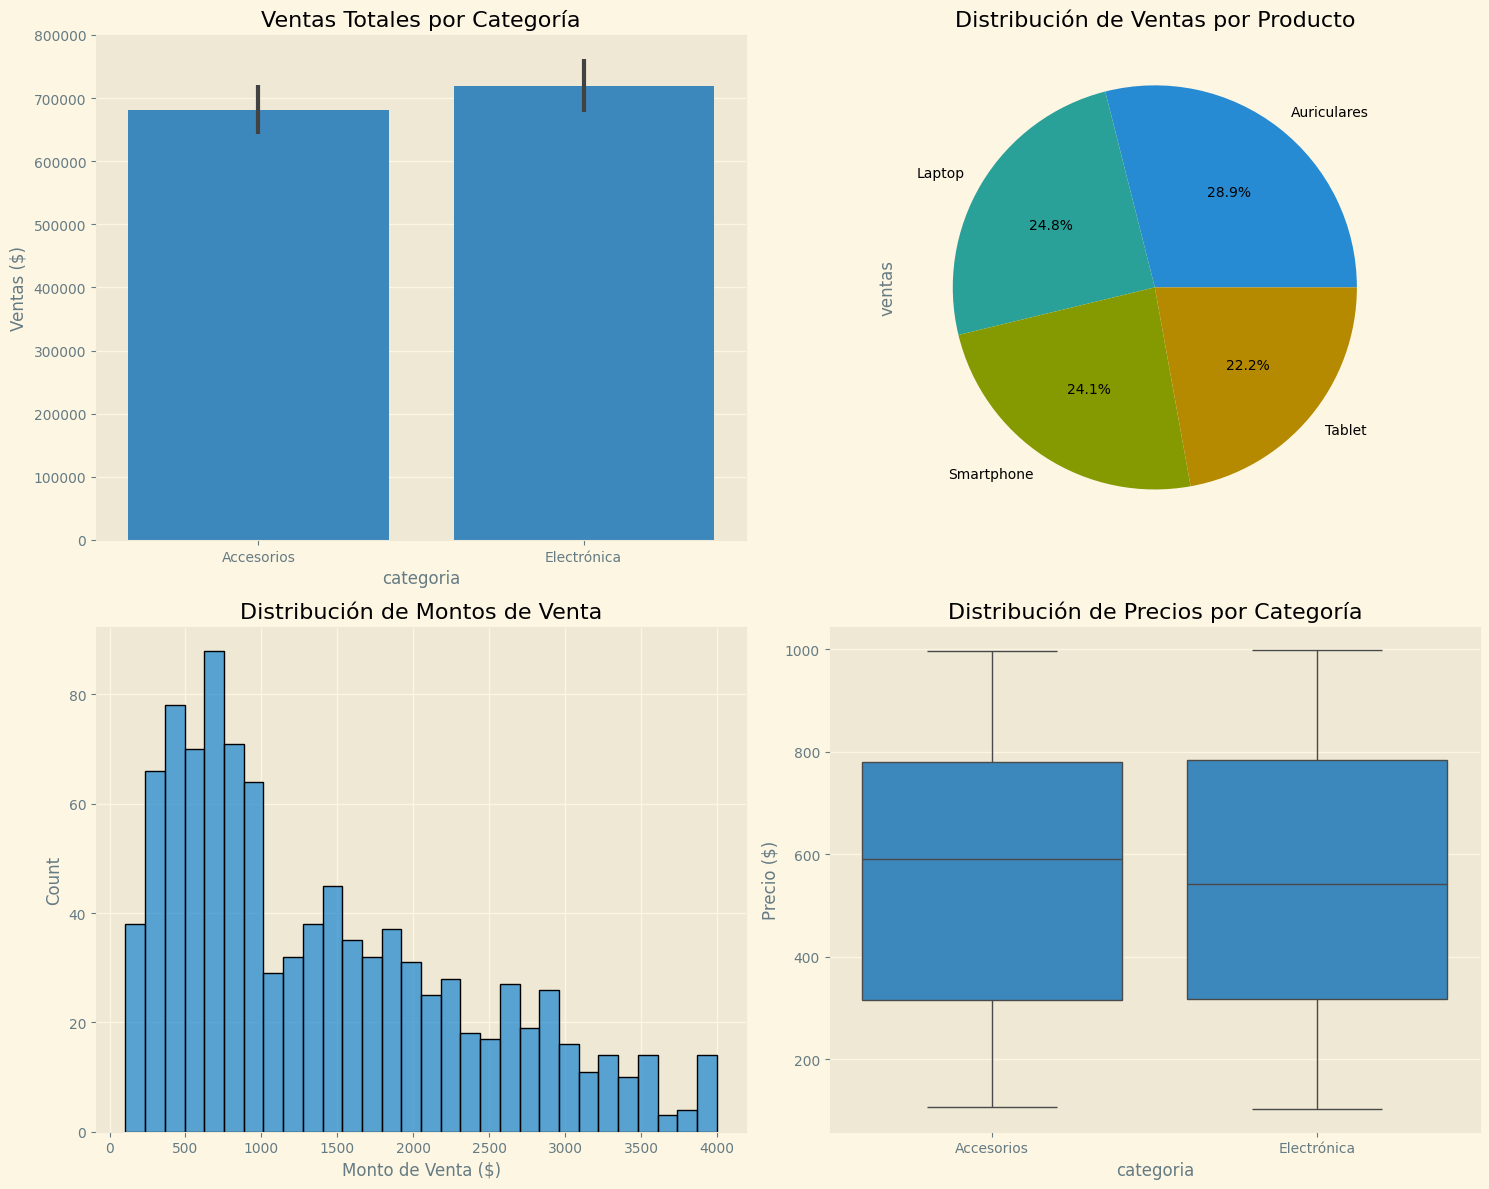

In [12]:
# Visualizaciones de ventas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Ventas por categoría
sns.barplot(data=df, x='categoria', y='ventas', estimator='sum', ax=axes[0,0])
axes[0,0].set_title('Ventas Totales por Categoría')
axes[0,0].set_ylabel('Ventas ($)')

# 2. Distribución por producto
df.groupby('producto')['ventas'].sum().plot(kind='pie', autopct='%1.1f%%', ax=axes[0,1])
axes[0,1].set_title('Distribución de Ventas por Producto')

# 3. Histograma de ventas
sns.histplot(data=df, x='ventas', bins=30, ax=axes[1,0])
axes[1,0].set_title('Distribución de Montos de Venta')
axes[1,0].set_xlabel('Monto de Venta ($)')

# 4. Box plot de precios
sns.boxplot(data=df, x='categoria', y='precio', ax=axes[1,1])
axes[1,1].set_title('Distribución de Precios por Categoría')
axes[1,1].set_ylabel('Precio ($)')

plt.tight_layout()
plt.show()


## Ejercicio 3: Análisis Temporal

### 3.1 Tendencias de Ventas
Analiza cómo varían las ventas a lo largo del tiempo.

#### 3.1.1 Agrupar ventas por fecha

In [13]:
df["dia"] = df["fecha"].dt.date
ventas_diarias = df.groupby('dia')['ventas'].sum()
display(ventas_diarias)

dia
2024-01-01   41531.28
2024-01-02   33745.58
2024-01-03   32949.69
2024-01-04   27595.70
2024-01-05   29160.68
2024-01-06   42956.70
2024-01-07   45404.33
2024-01-08   38350.76
2024-01-09   37091.74
2024-01-10   37607.28
2024-01-11   35387.96
2024-01-12   26606.03
2024-01-13   32397.71
2024-01-14   36007.28
2024-01-15   42948.91
2024-01-16   29737.64
2024-01-17   33968.76
2024-01-18   32344.70
2024-01-19   34737.31
2024-01-20   36911.79
2024-01-21   23024.53
2024-01-22   32529.17
2024-01-23   36691.97
2024-01-24   29076.20
2024-01-25   31575.28
2024-01-26   27407.36
2024-01-27   31531.44
2024-01-28   31931.35
2024-01-29   33937.79
2024-01-30   30015.64
2024-01-31   27410.83
2024-02-01   33849.89
2024-02-02   40738.10
2024-02-03   31725.93
2024-02-04   36253.78
2024-02-05   31396.87
2024-02-06   26898.37
2024-02-07   35065.50
2024-02-08   35487.50
2024-02-09   32963.59
2024-02-10   33752.42
2024-02-11   19994.68
Name: ventas, dtype: float64

#### 3.1.2. Calcular promedio móvil

In [ ]:
tendencia = ventas_diarias.rolling(window=7).mean()

#### 3.2.3. Identificar picos de venta y 3.2.4. Visualizar tendencia temporal

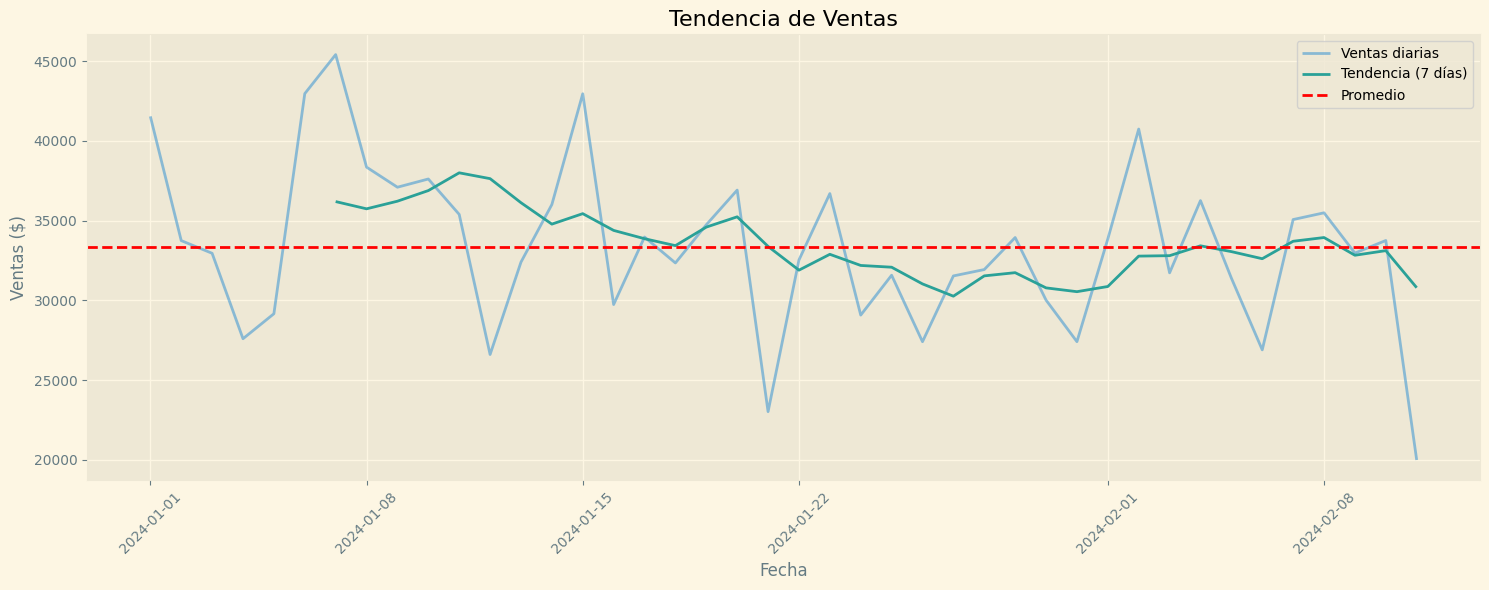

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(ventas_diarias.index, ventas_diarias.values, label='Ventas diarias', alpha=0.5)
plt.plot(tendencia.index, tendencia.values, label='Tendencia (7 días)', linewidth=2)
plt.axhline(y=ventas_diarias.mean(), color='r', linestyle='--', label='Promedio')

plt.title('Tendencia de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2 Patrones por Canal de Venta
Analiza las diferencias entre canales de venta.

#### 3.2.1 Comparar ventas por canal

In [16]:
ventas_canal = df.groupby(['canal', 'producto'])['ventas'].sum().unstack()
print('\nVentas por canal y producto:')
display(ventas_canal)


Ventas por canal y producto:


producto,Auriculares,Laptop,Smartphone,Tablet
canal,,,,
Online,208209.21,175533.18,177946.84,132997.35
Tienda,197261.03,172339.74,158955.72,177456.95


#### 3.2.2. Analizar preferencias de producto por canal

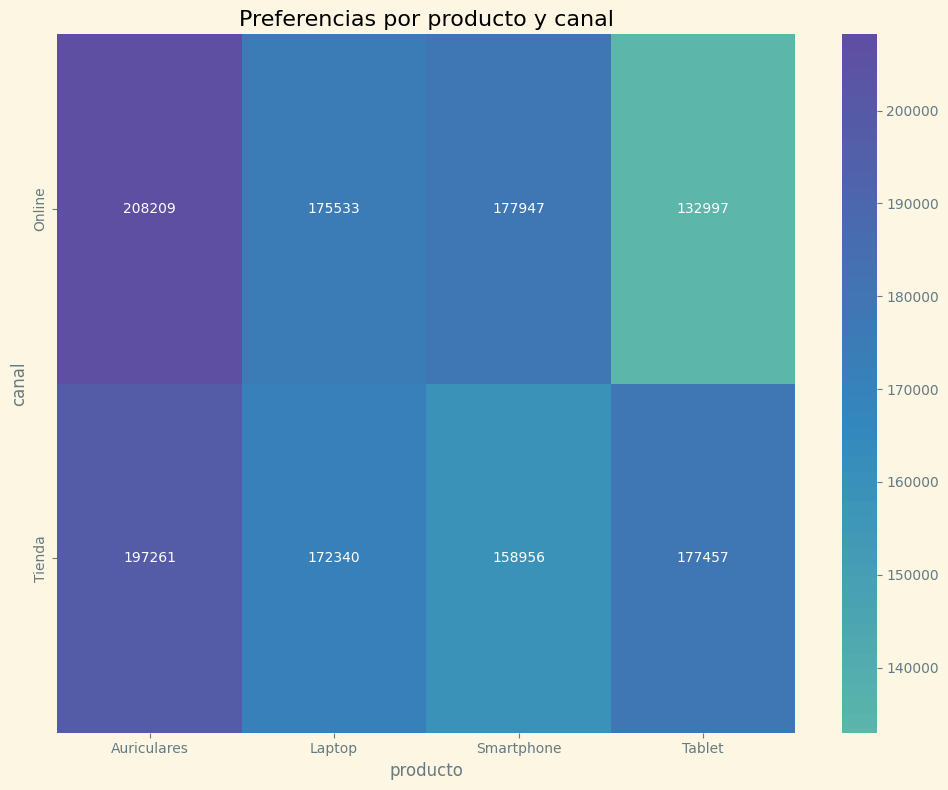

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(ventas_canal, annot=True, cmap='Spectral',fmt="g", center=0)
plt.title('Preferencias por producto y canal')
plt.tight_layout()
plt.show()

#### 3.2.3. Visualizar distribución de ventas por canal

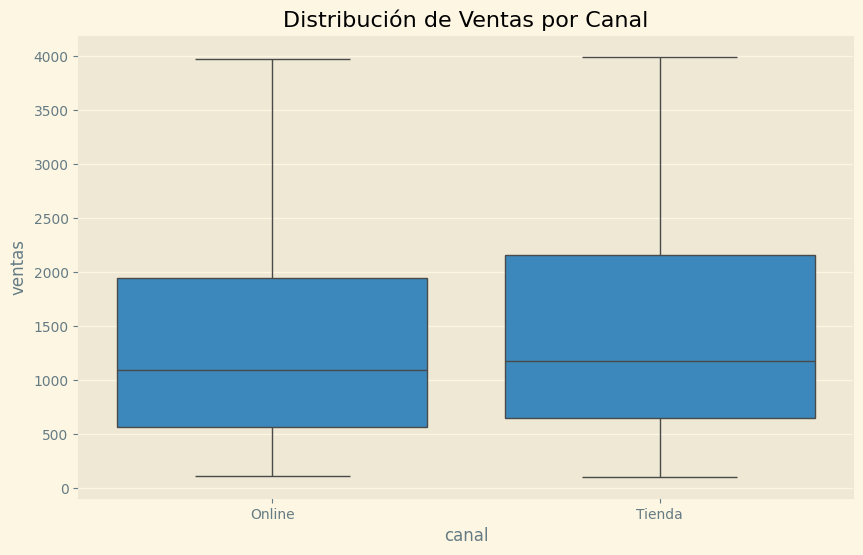

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='canal', y='ventas')
plt.title('Distribución de Ventas por Canal')
plt.show()

## Ejercicio 4: Análisis de Correlaciones
Identifica relaciones entre variables numéricas.

#### 4.1. Calcular matriz de correlación

In [19]:
df["dia_semana"] = df["fecha"].dt.day_of_week
variables_numericas = ['precio', 'cantidad', 'ventas', "dia_semana"]
correlaciones = df[variables_numericas].corr()
display(correlaciones)

,precio,cantidad,ventas,dia_semana
precio,1.00,0.02,0.69,-0.01
cantidad,0.02,1.00,0.67,-0.01
ventas,0.69,0.67,1.00,-0.01
dia_semana,-0.01,-0.01,-0.01,1.00


#### 4.2. Crear heatmap de correlaciones

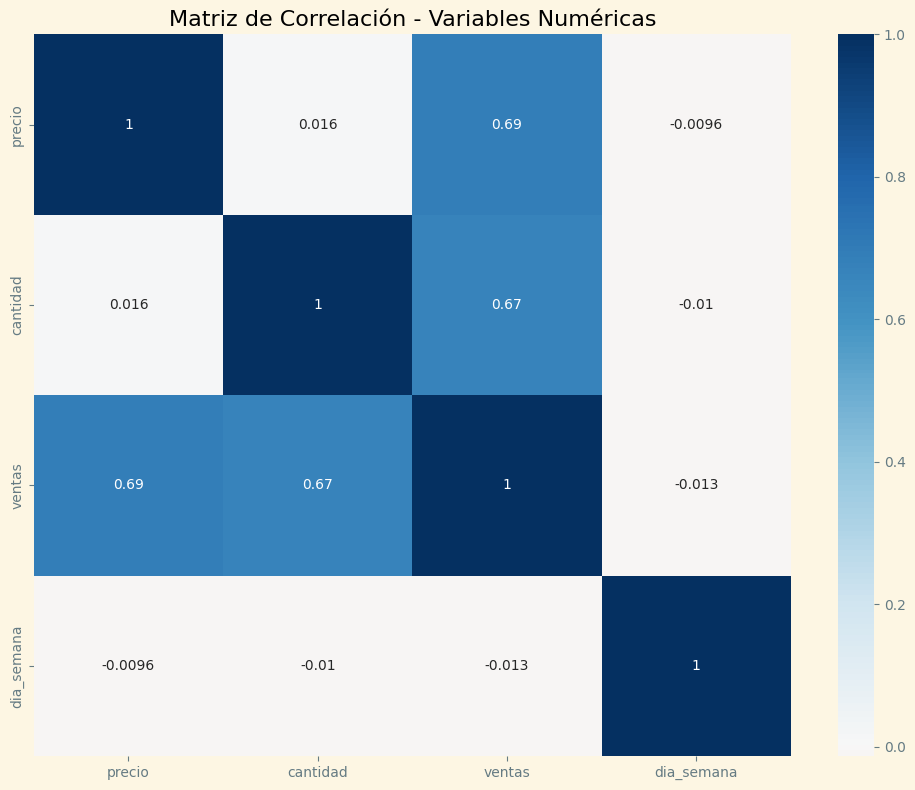

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='RdBu', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

#### 4.3. Identificar relaciones importantes

In [21]:
corr_flat = correlaciones.unstack()
corr_ord = corr_flat[corr_flat != 1.0].abs().sort_values(ascending=False)
display(corr_ord.head())


precio    ventas     0.69
ventas    precio     0.69
cantidad  ventas     0.67
ventas    cantidad   0.67
precio    cantidad   0.02
dtype: float64

## Ejercicio 5: Reporte Final
Prepara un resumen ejecutivo con los hallazgos principales.

### Principales Hallazgos

TODO: Completa esta sección con tus hallazgos principales. Incluye:
1. Métricas clave de ventas
2. Patrones identificados
3. Insights sobre canales de venta
4. Recomendaciones basadas en datos

Tu análisis aquí: